# 在线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x *  3. + 4. + np.random.normal(size=100) # 正态分布的噪音

In [3]:
X = x.reshape(-1,1)

In [4]:
X.shape

(100, 1)

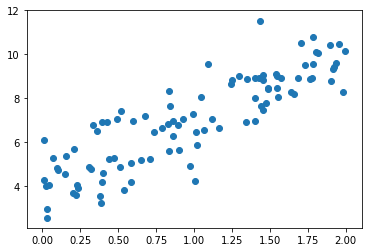

In [5]:
plt.scatter(x,y)
plt.show()

### 使用梯度下降法训练

In [6]:
def J(theta,X_b,y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b) 
    except:
        return float('inf')

In [7]:
def dJ(theta,X_b,y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1,len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [8]:
def gradient_decent(X_b,y,initial_theta,eta,n_iters = 1e4,epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if(abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon):
            break
        i_iter += 1
    
    return theta

In [9]:
X_b = np.hstack([np.ones((len(x),1)),x.reshape(-1,1)])
initial_theta = np.ones(X_b.shape[1])
eta = 0.01

theta = gradient_decent(X_b,y,initial_theta,eta)

In [10]:
theta

array([4.02145499, 3.0070652 ])

## 封装我们的线性回归算法

In [11]:
from LinearRegression import LinearRegression

In [12]:
lin_reg = LinearRegression()
lin_reg.fit_gd(X,y)

LinearRegression()

In [13]:
lin_reg.coef_

array([3.0070652])

In [14]:
lin_reg.interception_

4.021454986726703

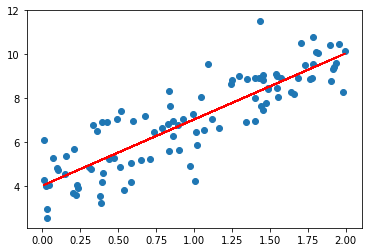

In [15]:
plt.scatter(x,y)
plt.plot(x,lin_reg.coef_ * x + lin_reg.interception_,color='r')
plt.show()